In [ ]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

SYNTAX : KERAS PREPROCESSING 

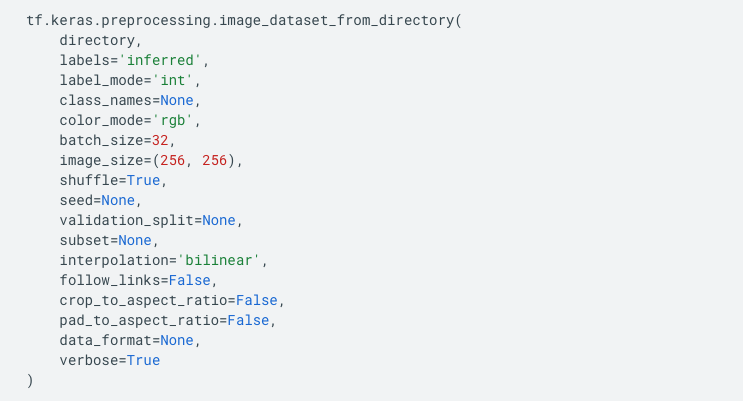

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL    = 3
EPOCHS     = 10

In [4]:
# Load the images into tensorflow database

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
#Get the list of class in the dataset
class_name = dataset.class_names
print(class_name)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
#Length of dataset 

print(len(dataset))

68


In [7]:
#We have 2176 images, then why is it only 68 ???
#Here 68 is number of batches, and batch size is 32. 

32*68

2176

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1]


2025-03-01 09:33:32.606645: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)
    print(image_batch[0].numpy())


(256, 256, 3)
[[[206. 203. 210.]
  [203. 200. 207.]
  [198. 195. 202.]
  ...
  [177. 175. 186.]
  [178. 176. 187.]
  [180. 178. 189.]]

 [[200. 197. 204.]
  [198. 195. 202.]
  [196. 193. 200.]
  ...
  [179. 177. 188.]
  [178. 176. 187.]
  [176. 174. 185.]]

 [[196. 193. 200.]
  [194. 191. 198.]
  [194. 191. 198.]
  ...
  [179. 177. 188.]
  [176. 174. 185.]
  [172. 170. 181.]]

 ...

 [[151. 146. 153.]
  [144. 139. 146.]
  [144. 139. 146.]
  ...
  [139. 136. 147.]
  [142. 138. 152.]
  [157. 153. 167.]]

 [[148. 143. 150.]
  [143. 138. 145.]
  [148. 143. 150.]
  ...
  [147. 144. 155.]
  [147. 143. 157.]
  [152. 148. 162.]]

 [[147. 142. 149.]
  [144. 139. 146.]
  [150. 145. 152.]
  ...
  [143. 140. 151.]
  [139. 135. 149.]
  [136. 132. 146.]]]


2025-03-01 09:33:33.550607: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


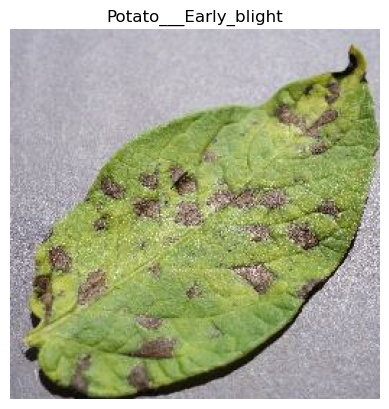

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    plt.axis("off")

2025-03-01 09:33:35.052033: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


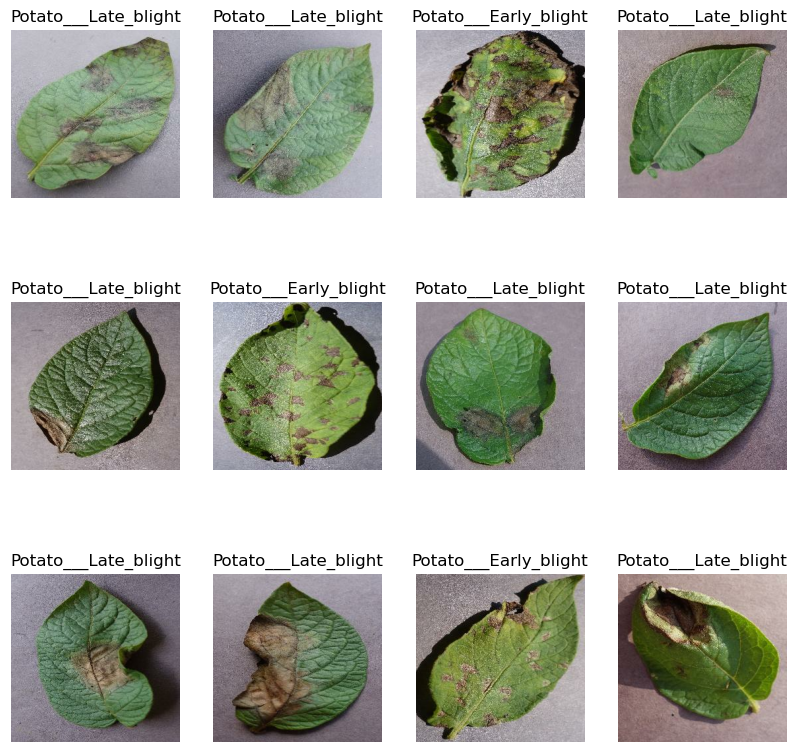

In [11]:
# Wanted to display first 12 imgaes in batch#1

plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [12]:
#Spliting the data for training and test
#80% training, 20% test (10%-validation, 10% test)

train_size = 0.8 #80%
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
val_size = 0.1 #10% for validation 
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)  #Validation dataset
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6) #Test dataset
len(test_ds)

8

In [18]:
#Method : get_dataset_partitions_tf

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=1000):
    
    ds_size =len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(ds_size * train_split)
    val_size   = int(ds_size * val_split)
    test_size  = int(ds_size * test_split)

    train_ds = ds.take(train_size)
    val_ds   = ds.skip(train_size).take(val_size)
    test_ds  = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [26]:
print(f"len of train ds : {len(train_ds)}")
print(f"len of val ds   : {len(val_ds)}")
print(f"len of test ds  : {len(test_ds)}")

len of train ds : 54
len of val ds   : 6
len of test ds  : 8


In [27]:
# TO improve the performance, using cache to store the data into the cache instead of reading it everytime 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#Now, the data is optimized and training will be little fast

In [28]:
#Scaling 

resize_and_rescale = tf.keras.Sequential([
    #layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    #layers.experimental.preprocessing.Rescaling(1.0/255)
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
    
])

In [29]:
#Data augmentation layer

data_augmentation = tf.keras.Sequential([
    #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    #layers.experimental.preprocessing.RandomRotation(0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

])


SYNTAX Conv2D

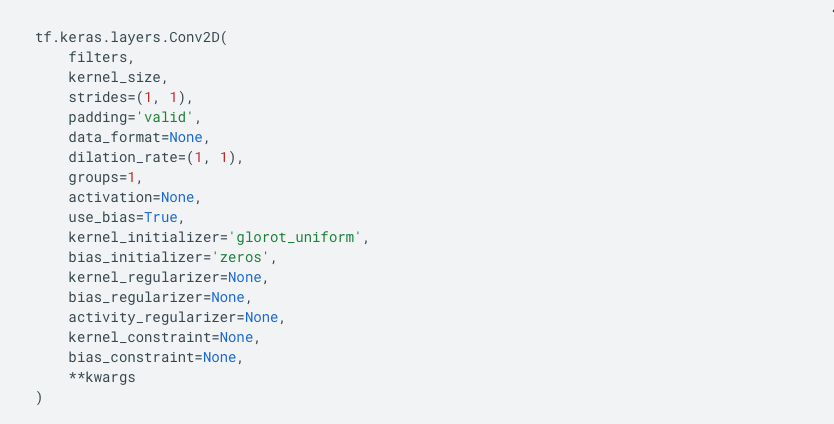

In [30]:
# Model creation : CNN 

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes   = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Optimizers, 

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.4443 - loss: 0.9605 - val_accuracy: 0.4769 - val_loss: 0.8782
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 418ms/step - accuracy: 0.5177 - loss: 0.8722 - val_accuracy: 0.7448 - val_loss: 0.5677
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 421ms/step - accuracy: 0.6744 - loss: 0.6979 - val_accuracy: 0.7911 - val_loss: 0.4945
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 421ms/step - accuracy: 0.7809 - loss: 0.4989 - val_accuracy: 0.8206 - val_loss: 0.4299
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 419ms/step - accuracy: 0.8224 - loss: 0.4238 - val_accuracy: 0.7859 - val_loss: 0.4567
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 429ms/step - accuracy: 0.8718 - loss: 0.3435 - val_accuracy: 0.9022 - val_loss: 0.2276
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.8958 - loss: 0.2402 - val_accuracy: 0.9109 - val_loss: 0.2054
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 419ms/step - accuracy: 0.9150 - loss: 0.2199 - val_accu

In [34]:
scores = model.evaluate(test_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8290 - loss: 0.4035


In [35]:
scores

[0.3910753130912781, 0.8339120149612427]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
history.history['accuracy'] # 50 values from 50 EPOCHS

[0.48668980598449707,
 0.5462962985038757,
 0.6973379850387573,
 0.7829861044883728,
 0.8339120149612427,
 0.8836805820465088,
 0.9021990895271301,
 0.9265046119689941,
 0.9479166865348816,
 0.9403935074806213]

In [40]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Loss')

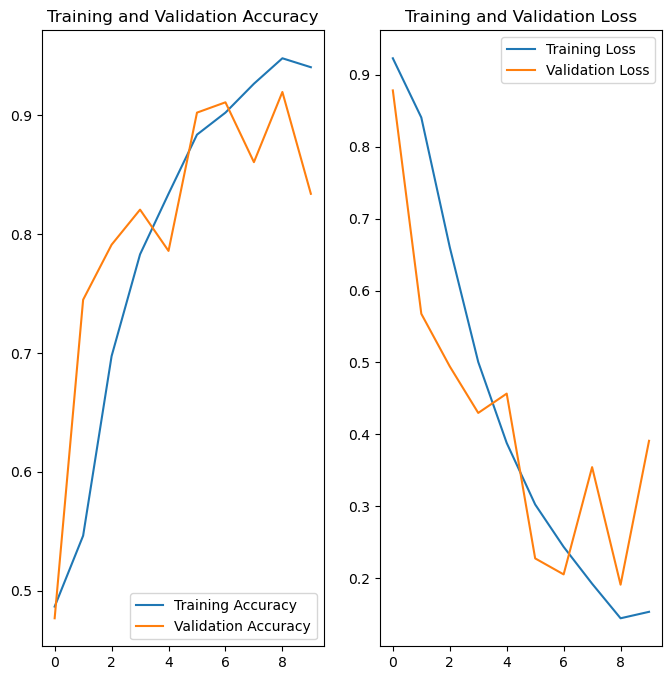

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



First Image to Predict
Actual Label : Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Actual Prediction : Potato___Late_blight


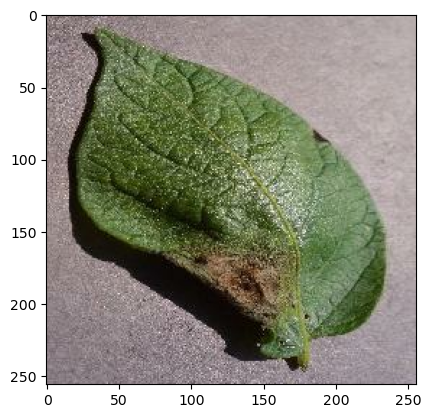

In [42]:
#Predicting 

import numpy as np 
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print(f"First Image to Predict")
    plt.imshow(first_image)
    print(f"Actual Label : {class_name[first_label]}")
    batch_prediction = model.predict(image_batch)
    print(f"Actual Prediction : {class_name[np.argmax(batch_prediction[0])]}")

In [59]:
def predict(model,imges):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


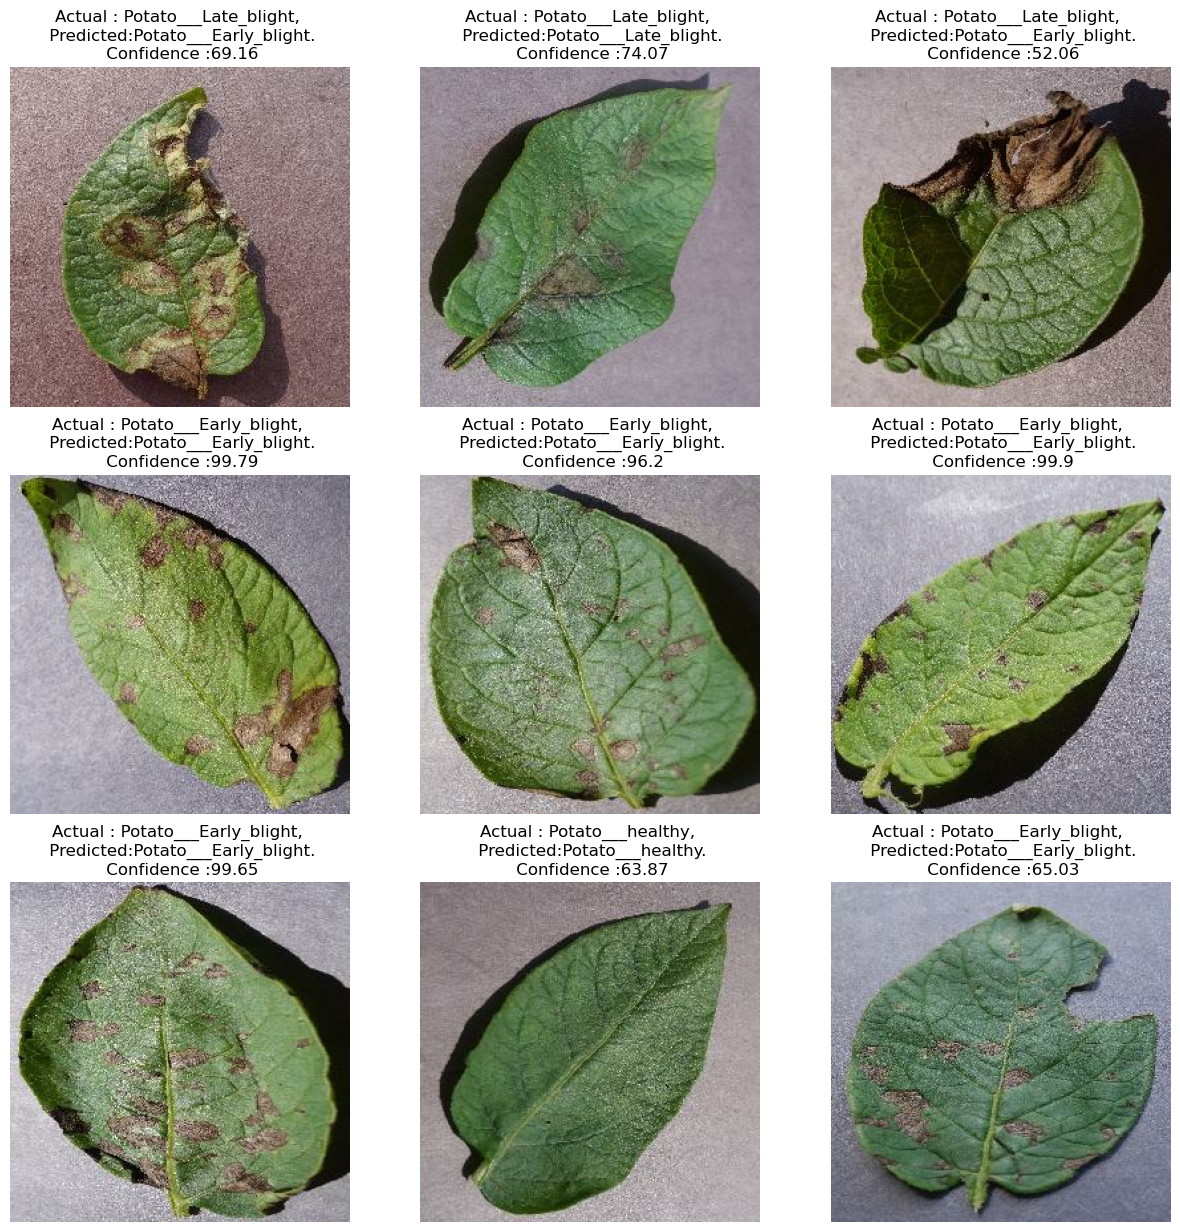

In [84]:

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual : {actual_class}, \n Predicted:{predicted_class}.\n Confidence :{confidence}")    
        plt.axis("off")

In [89]:
#Save the model to files. 

import os 

files = [i for i in os.listdir("../models") + [0]]
print(files)
model_version = max([int(i.removesuffix(".keras")) if isinstance(i, str) else i for i in files])

print(model_version)
#model.save(f"../models/{model_version}.keras")

['2.keras', '1.keras', 0]
1
